## 实验1 第2题

###  1. 使用Python实现决策树

In [1]:
from math import log
import operator
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import random
import numpy as np
import sklearn
from sklearn import metrics

'''
函数说明：计算给定数据集的香农熵
参数：dataSet -- 数据集
返回值：shannonEnt -- 数据集的熵
'''
def calcShannonEnt(dataset):
    totalNum = len(dataset)
    labelCounts = {}
    for featVec in dataset:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():          
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / totalNum
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

# calcShannonEnt(traind)

In [2]:
'''
函数说明：按照给定特征划分数据集
参数：dataSet -- 待划分的数据集
      axis -- 划分数据集的特征
      value -- 特征的返回值
返回值：retDataSet -- 划分好的数据集
'''
def splitDataSet(dataset,axis,value):
    retDataSet = []
    for featVec in dataset:
        if featVec[axis] == value:
            #把划分数据集的特征从数据集中剔除，
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


In [3]:
'''
函数说明：选择最佳划分特征
参数：dataset -- 待划分的数据集
返回值：最佳划分特征
'''
def chooseBestFeatureToSplit(dataset):
    # 数据集特征数
    numFeatures = len(dataset[0]) - 1
    # 原始数据的信息熵
    bestEntropy = calcShannonEnt(dataset)
    #最大信息增益
    bestInfoGain = 0.0
    # 最佳划分特征
    bestFeature = -1
    for i in range(numFeatures):
        featureList = [example[i] for example in dataset]
        # 特征对应的取值
        uniqueVals = set(featureList)
        newEntropy = 0.0
        for value in uniqueVals:
#             # 遍历划分每个特征的每个取值
            subDataSet = splitDataSet(dataset,i,value)
            prob = len(subDataSet) / float(len(dataset))

            newEntropy += prob * calcShannonEnt(subDataSet)
        info_gain = bestEntropy - newEntropy
        if info_gain > bestInfoGain:
            bestInfoGain = info_gain
            bestFeature = i
    return bestFeature

In [4]:
'''
函数说明：使用matplotlib绘制树节点
参数：nodeText -- 节点注解
      centerPt -- 子节点
      parentPt -- 父节点
      nodeType -- 节点类型
返回值： 无

'''
# 定义判断节点、子节点以及箭头的格式
decisionNode = dict(boxstyle = "sawtooth",fc = "0.8")
leafNode = dict(boxstyle = "round4",fc = "0.8")
arrow_args = dict(arrowstyle = "<-")

def plotNode(nodeText,centerPt,parentPt,nodeType):
    # 绘制带箭头的注解
    createPlot.ax1.annotate(nodeText,xy=parentPt,xycoords = 'axes fraction',xytext = centerPt,textcoords = 'axes fraction',va = "center",ha = "center",bbox = nodeType,arrowprops = arrow_args)

def createPlot():
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon = False)
    # 绘制判断节点
    plotNode('a decison node',(0.5,0.1),(0.1,0.5),decisionNode)
    # 绘制子节点
    plotNode('a leaf node',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

In [5]:
'''
函数说明：获取叶子节点的数目以及数的高度
参数：myTree -- 决策树
返回值: numLeafs -- 叶子节点数
        maxDepth -- 数的高度
'''
def getNumLeafs(myTree):
    #初始化叶子节点数
    numLeafs = 0
    #得到第一个关键字
    firstStr = list(myTree.keys())[0]
    # 得到第一个关键字的值，该值又是一个字典
    secondDict = myTree[firstStr]
    # 遍历第二个字典的值，判断是字典还是叶子节点
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            # 递归遍历
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs


def getTreeDepth(myTree):
    # 初始化数的高度
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [6]:
'''
函数说明：在父子节点之间填充文本信息
参数：cntrPt -- 子节点
      parentPt -- 父节点
      txtString -- 文本信息
返回值：无
'''
def plotMidText(cntrPt,parentPt,txtString):
    # 文本信息的横坐标
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)

'''
函数说明：绘制的具体步骤
参数：mytree -- 决策树
      parentPt -- 父节点
      nodeTxt -- 节点信息
返回值：无
'''
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    # 决策树的第一个关键字
    firstStr = list(myTree.keys())[0]
    # 计算子节点的位置
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs)) / 2.0 / plotTree.totalW,plotTree.yOff)
    # 在父子节点之间填充文本信息
    plotMidText(cntrPt,parentPt,nodeTxt)
    # 绘制节点
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0 / plotTree.totalD
    # 递归绘制决策树
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff =  plotTree.xOff + 1 / plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff = plotTree.yOff + 1.0 / plotTree.totalD

In [7]:
'''
函数说明:将决策树以图形的形式绘制出来
参数：inTree -- 决策树
返回值：无
'''
def createPlot(inTree):
    fig = plt.figure(1,facecolor = 'white')
    fig.clf()
    #将xy坐标存放于一个字典内，不过此时的xy坐标值为空
    axprops = dict(xticks=[],ytick=[])
    createPlot.ax1 = plt.subplot(111,frameon=False)
    # 数的宽度，用于计算判断节点的位置（应该在水平方向和垂直方向的中心位置）
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    #例如有三个叶子节点，那么它们将x轴平分为三等分，坐标依次为1/3,2/3,3/3,但此时整个图像靠右，并不在画布的中心，因此将其向左移
    # plotTree.xOff、plotTree.yOff用于追踪已绘制节点的位置，以及放置下一个节点的位置
    plotTree.xOff = -0.5 / plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()


In [8]:
'''
函数说明：构造使用决策树的分类函数
参数：inputTree -- 输入的决策树
      featLabels -- 数据集属性
      testVec -- 需要预测类别的节点
返回值：预测节点的类别
'''
def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else:
                classLabel = secondDict[key]
    return classLabel


In [9]:
def createTree(data_set, labels):

    class_list = [ex[-1] for ex in data_set]

    if len(set(class_list)) == 1:
        return class_list[0]
    if len(data_set[0]) == 1:
        return Counter(class_list).most_common(1)[0][0]
    
    best_feat = chooseBestFeatureToSplit(data_set)
    best_feat_label = labels[best_feat]
    my_tree = {best_feat_label:{}}
    del(labels[best_feat])
    
    for value in set([ex[best_feat] for ex in data_set]):
        sub_labels = labels[:]
        my_tree[best_feat_label][value] = createTree(splitDataSet(data_set,best_feat,value),sub_labels)
    return my_tree    

In [10]:
def split_dataset(dataset):
    count = len(dataset)
#     print(count)
    test_num = random.sample(range(count),int(count*0.25))
    test_dataset = []
    train_dataset = []
    for i in range(count):
        if i in test_num:
            test_dataset.append(dataset[i])
        else:
            train_dataset.append(dataset[i])
        
    return train_dataset,test_dataset

In [11]:
def testRate(imputTree,featLabels,test_dataset):
    right = 0
    for i in range(len(test_dataset)):
        result = classify(imputTree,featLabels,test_dataset[i][0:4])
        if result == test_dataset[i][4]:
            right += 1
    rate = right / len(test_dataset)
    return rate

In [12]:
def getPred(imputTree,featLabels,test_dataset):
    pred = []
    for i in range(len(test_dataset)):
        pred.append(classify(imputTree,featLabels,test_dataset[i][0:4])) 

    return pred

# lensesLabels = ['age','prescript','astigmatic','tearRate']  
# getPred(lensesTree,lensesLabels,testd)

In [13]:
# 加载隐形眼镜数据集，并将其序列化，最后生成决策树
fr = open('glass-lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]

# 年龄、症状、是否散光、眼泪数量四个属性
lensesLabels = ['age','prescript','astigmatic','tearRate']

# 根据隐形眼镜的数据集和属性标签构造决策树
traind,testd = split_dataset(lenses)
lensesTree = createTree(traind,lensesLabels)

lensesLabels = ['age','prescript','astigmatic','tearRate']   

right_rate = testRate(lensesTree,lensesLabels,testd)

print('准确率：',right_rate)
 # print(lensesTree)
createPlot(lensesTree)

UnboundLocalError: local variable 'classLabel' referenced before assignment

In [ ]:
pred1 = getPred(lensesTree,lensesLabels,testd)
y_test = [a[4] for a in testd]

# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, pred1))
print('模型的评估报告：\n',metrics.classification_report(y_test, pred1))

In [ ]:
# 混淆矩阵
cm = metrics.confusion_matrix(y_test, pred1)
cm

###  2. 使用sklearn包进行验证

In [14]:
#决策树验证
# 导入第三方包
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics
from sklearn import tree

# 读入数据
fr = open('glass-lenses.txt')
lenses = [inst.strip().split('\t') for inst in fr.readlines()]

lensesLabels = ['age','prescript','astigmatic','tearRate','type']
lens = pd.DataFrame.from_records(lenses, columns=lensesLabels)

lens

,age,prescript,astigmatic,tearRate,type
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses
5,young,hyper,no,normal,soft
6,young,hyper,yes,reduced,no lenses
7,young,hyper,yes,normal,hard
8,pre,myope,no,reduced,no lenses
9,pre,myope,no,normal,soft


In [15]:
 #哑变量处理
dummy = pd.get_dummies(lens[['age','prescript','astigmatic','tearRate']])

# 水平合并Titanic数据集和哑变量的数据集
lens = pd.concat([lens,dummy], axis = 1)

# 删除原始的Sex、Embarked和Pclass变量
lens.drop(['age','prescript','astigmatic','tearRate'], inplace=True, axis = 1)
lens.head()

,type,age_pre,age_presbyopic,age_young,prescript_hyper,prescript_myope,astigmatic_no,astigmatic_yes,tearRate_normal,tearRate_reduced
0,no lenses,0,0,1,0,1,1,0,0,1
1,soft,0,0,1,0,1,1,0,1,0
2,no lenses,0,0,1,0,1,0,1,0,1
3,hard,0,0,1,0,1,0,1,1,0
4,no lenses,0,0,1,1,0,1,0,0,1


In [16]:
# 将数据集拆分为训练集和测试集，且测试集的比例为25%
X_train, X_test, y_train, y_test = model_selection.train_test_split(lens.loc[:,'age_pre':'tearRate_reduced'],lens.type, 
                                                                    test_size = 0.25, random_state = 1234)

In [17]:
# 构建分类决策树
ID3_Class = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4, min_samples_leaf = 2, min_samples_split=3)

# 模型拟合
decision_tree = ID3_Class.fit(X_train, y_train)

# 模型在测试集上的预测
pred = ID3_Class.predict(X_test)

# 模型的准确率
print('模型在测试集的预测准确率：\n',metrics.accuracy_score(y_test, pred))

模型在测试集的预测准确率：
 0.6666666666666666


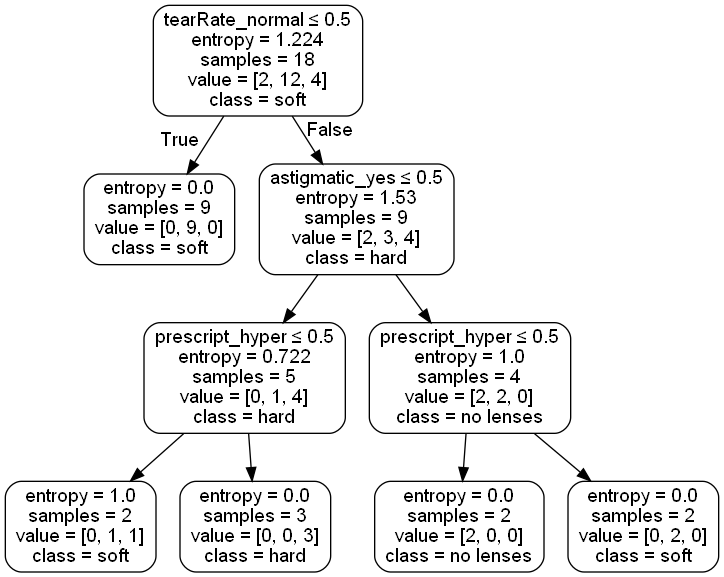

In [18]:
from sklearn.tree import export_graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'  #注意修改你的路径
from IPython.display import Image
import pydotplus
from six import StringIO

# 绘制决策树
predictors = lens.columns[1:]
dot_data = StringIO()
export_graphviz(
    decision_tree,
    out_file=dot_data,  
    feature_names=predictors,
    class_names=['no lenses','soft','hard'],  
    # filled=True,
    rounded=True,  
    special_characters=True
)

# # 决策树展现
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png()) 

In [19]:
# 返回模型的预测效果
print('模型的准确率为：\n',metrics.accuracy_score(y_test, pred))
print('模型的评估报告：\n',metrics.classification_report(y_test, pred))

模型的准确率为：
 0.6666666666666666
模型的评估报告：
               precision    recall  f1-score   support

        hard       1.00      0.50      0.67         2
   no lenses       0.60      1.00      0.75         3
        soft       0.00      0.00      0.00         1

    accuracy                           0.67         6
   macro avg       0.53      0.50      0.47         6
weighted avg       0.63      0.67      0.60         6



C:\Users\lsiyu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# 需要绘制多分类的PR，ROC曲线， https://zhuanlan.zhihu.com/p/444339563 
#  以后再学习。2022.3.20

from sklearn.metrics import precision_recall_curve

# 混淆矩阵
cm = metrics.confusion_matrix(y_test, pred)
cm

# # 绘制PR曲线
# precision, recall, threshold = precision_recall_curve(y_test, pred,pos_label=0)
# precision, recall, threshold = precision_recall_curve(y_test, pred)
# fig = plt.figure()
# plt.plot(precision, recall, label='glass-lenses')

# # 绘制ROC曲线
# # 计算不同阈值下，fpr和tpr的组合值，其中fpr表示1-Specificity，tpr表示Sensitivity
# fpr,tpr,threshold = metrics.roc_curve(y_test, pred)
# # 计算AUC的值
# roc_auc = metrics.auc(fpr,tpr)

array([[1, 1, 0],
       [0, 3, 0],
       [0, 1, 0]], dtype=int64)